In [1]:
import numpy
import random
import matplotlib.pyplot as plt

In [2]:
def loss_function(y, t): # L2 Loss
    return numpy.mean((y - t) ** 2) / 2

def compute_gradient(y, t, x):
    return numpy.array([numpy.mean(y - t), numpy.mean((y - t) * x)])

def linear_function(a, b, x):
    return a * x + b

def gradient_descent(w, theta, x, t):
    for _ in range(100):
        y = numpy.asarray([linear_function(w[1], w[0], i) for i in x])
        loss = loss_function(y, t)
        gradient = compute_gradient(y, t, x)
        w -= theta * gradient
    return w

[   2.79497111 -538.20285478]
[  11.31728693 9523.01005441]
[-1.51631693e+02 -1.68502028e+05]
[2.72189613e+03 2.98150746e+06]
[-4.81306400e+04 -5.27553703e+07]
[8.51657755e+05 9.33463734e+08]
[-1.50693773e+07 -1.65168880e+10]
[2.66640495e+08 2.92253014e+11]
[-4.71798852e+09 -5.17118140e+12]
[8.34810022e+10 9.14998848e+13]
[-1.47712901e+12 -1.61901668e+15]
[2.61366067e+13 2.86471945e+16]
[-4.62466179e+14 -5.06889005e+17]
[8.18296609e+15 8.96899217e+18]
[-1.44790986e+17 -1.58699084e+20]
[2.56195974e+18 2.80805231e+21]
[-4.53318116e+19 -4.96862212e+22]
[8.02109849e+20 8.79157616e+23]
[-1.4192687e+22 -1.5555985e+25]
[2.51128150e+23 2.75250611e+26]
[-4.44351011e+24 -4.87033759e+27]
[7.86243281e+25 8.61766962e+28]
[-1.39119408e+27 -1.52482714e+30]
[2.46160574e+28 2.69805867e+31]
[-4.35561285e+29 -4.77399724e+32]
[7.70690569e+30 8.44720313e+33]
[-1.36367481e+32 -1.49466447e+35]
[2.41291261e+33 2.64468826e+36]
[-4.26945428e+34 -4.67956260e+37]
[7.55445506e+35 8.28010865e+38]
[-1.33669990e+37 -

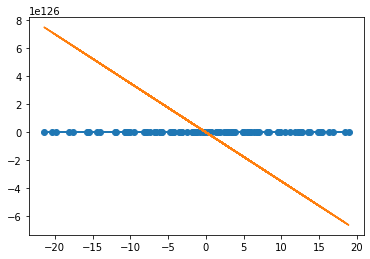

In [3]:
# generate data
amount = 100
a = random.uniform(-5, 5)
b = random.uniform(-5, 5)
x = numpy.random.normal(0,10,amount)

# data points for the line
source = numpy.asarray([linear_function(a, b, i) for i in x])

# data points for training with uniform noise
t = numpy.asarray([linear_function(a, b, i) + random.uniform(-10,10) for i in x])
X = numpy.hstack((x.reshape(amount,1),t.reshape(amount,1)))

# run gradient descent
weights = numpy.random.normal(size=2)
theta = 0.2
optimized_weights = gradient_descent(numpy.copy(weights), theta, x, t)
optimized_y = numpy.asarray([linear_function(optimized_weights[1], optimized_weights[0], i) for i in x])

# plot data
plt.scatter(x,X[:,1])
plt.plot(x,source,'-')
plt.plot(x,optimized_y.T,'-')
plt.show()